In [4]:
!pip install opencv-python-headless

     --------------------------------------- 35.5/35.5 MB 38.4 MB/s eta 0:00:00


In [2]:
import os
import glob

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math

import pickle
import cv2
import mediapipe as mp

In [3]:
directory = "C:/Users/HOME/Desktop/AI_project/KSL/KSL_rgb"

In [4]:
Class_name = os.listdir(directory)

In [13]:
print(Class_name)

['00_01', '00_02', '00_03', '00_04', '00_05', '00_06', '00_07', '00_08', '00_09', '00_10', '00_11', '00_13', '00_14', '00_15', '00_16', '00_17', '00_18', '00_20', '00_21', '00_22', '00_23', '00_24', '00_25', '00_26', '00_27', '00_29', '00_30', '00_31', '00_32', '00_34', '00_36', '00_37', '00_38', '00_39', '00_40', '00_41', '00_43', '00_44', '00_47', '00_48', '00_49', '00_50', '00_51', '00_52', '00_54', '00_55', '00_56', '00_57', '00_58', '00_59', '00_60', '00_61', '00_62', '00_63', '00_64', '00_65', '00_66', '00_67', '00_68', '00_69', '00_70', '00_71', '00_72', '00_74', '00_76', '00_77', '01_01', '01_02', '01_03', '01_04', '01_05', '01_06', '01_07', '01_08', '01_09', '01_11', '01_13', '01_14', '01_15', '01_16', '01_17', '01_18', '01_20', '01_21', '01_22', '01_23', '01_24', '01_26', '01_27', '01_29', '01_30', '01_31', '01_32', '01_34', '01_36', '01_37', '01_38', '01_39', '01_40', '01_41', '01_43', '01_44', '01_47', '01_48', '01_49', '01_50', '01_51', '01_52', '01_55', '01_57', '01_58', 

In [5]:
data = []
for i in Class_name:
    path = os.path.join(directory, i)
    file_list = os.listdir(path)
    
    for j in file_list:
        name = j
        label1 = i
        label2 = i[3:5]
    
        eda = [name, label1, label2]
        data.append(eda)

In [6]:
DF=pd.DataFrame(data, columns=['name','fold','class'])
DF['path']=directory+'/'+DF['fold']+'/'+DF['name']
DF

,name,fold,class,path
0,00_01.0001.jpg,00_01,01,C:/Users/HOME/Desktop/AI_project/KSL/KSL_rgb/0...
1,00_01.0002.jpg,00_01,01,C:/Users/HOME/Desktop/AI_project/KSL/KSL_rgb/0...
2,00_01.0003.jpg,00_01,01,C:/Users/HOME/Desktop/AI_project/KSL/KSL_rgb/0...
3,00_01.0004.jpg,00_01,01,C:/Users/HOME/Desktop/AI_project/KSL/KSL_rgb/0...
4,00_01.0005.jpg,00_01,01,C:/Users/HOME/Desktop/AI_project/KSL/KSL_rgb/0...
...,...,...,...,...
112559,19_77.0123.jpg,19_77,77,C:/Users/HOME/Desktop/AI_project/KSL/KSL_rgb/1...
112560,19_77.0124.jpg,19_77,77,C:/Users/HOME/Desktop/AI_project/KSL/KSL_rgb/1...
112561,19_77.0125.jpg,19_77,77,C:/Users/HOME/Desktop/AI_project/KSL/KSL_rgb/1...
112562,19_77.0126.jpg,19_77,77,C:/Users/HOME/Desktop/AI_project/KSL/KSL_rgb/1...


In [7]:
DF_sorry=DF[DF['class']=='15']
DF_sorry

,name,fold,class,path
1390,00_15.0001.jpg,00_15,15,C:/Users/HOME/Desktop/AI_project/KSL/KSL_rgb/0...
1391,00_15.0002.jpg,00_15,15,C:/Users/HOME/Desktop/AI_project/KSL/KSL_rgb/0...
1392,00_15.0003.jpg,00_15,15,C:/Users/HOME/Desktop/AI_project/KSL/KSL_rgb/0...
1393,00_15.0004.jpg,00_15,15,C:/Users/HOME/Desktop/AI_project/KSL/KSL_rgb/0...
1394,00_15.0005.jpg,00_15,15,C:/Users/HOME/Desktop/AI_project/KSL/KSL_rgb/0...
...,...,...,...,...
107390,19_15.0109.jpg,19_15,15,C:/Users/HOME/Desktop/AI_project/KSL/KSL_rgb/1...
107391,19_15.0110.jpg,19_15,15,C:/Users/HOME/Desktop/AI_project/KSL/KSL_rgb/1...
107392,19_15.0111.jpg,19_15,15,C:/Users/HOME/Desktop/AI_project/KSL/KSL_rgb/1...
107393,19_15.0112.jpg,19_15,15,C:/Users/HOME/Desktop/AI_project/KSL/KSL_rgb/1...


In [8]:
with open('C:/Users/HOME/Desktop/AI_project/KSL/class_label.p','rb') as f:
    Labels=pickle.load(f)

In [11]:
Labels

{0: ' ',
 1: 'hi',
 2: 'what',
 3: 'meat',
 4: 'bi bim rice',
 5: 'glad',
 6: 'hobby',
 7: 'me',
 8: 'movie',
 9: 'face',
 10: 'see',
 11: 'name',
 12: 'read',
 13: 'thank',
 14: 'equal',
 15: 'sorry',
 16: 'eat',
 17: 'fine',
 18: 'do effort',
 19: 'next',
 20: 'age',
 21: 'again',
 22: 'how many',
 23: 'day',
 24: 'good, nice',
 25: 'when',
 26: 'we',
 27: 'subway',
 28: 'be friendly',
 29: 'bus',
 30: 'ride',
 31: 'cell phone',
 32: 'where',
 33: 'number',
 34: 'location',
 35: 'guide',
 36: 'responsibility',
 37: 'who',
 38: 'arrive',
 39: 'family',
 40: 'time',
 41: 'introduction',
 42: 'recieve',
 43: 'please?',
 44: 'walk',
 45: 'parents',
 46: '10 minutes',
 47: 'sister',
 48: 'study',
 49: 'human',
 50: 'now',
 51: 'special',
 52: 'yesterday',
 53: 'education',
 54: 'test',
 55: 'end',
 56: 'you',
 57: 'worried_about',
 58: 'marry',
 59: 'effort',
 60: 'no',
 61: 'sweat',
 62: 'yet',
 63: 'finally',
 64: 'born',
 65: 'success',
 66: 'favor',
 67: 'Seoul',
 68: 'dinner',
 69: '

In [6]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

Handedness: [classification {
  index: 0
  score: 0.9843126535415649
  label: "Left"
}
]
hand_landmarks: landmark {
  x: 0.46834975481033325
  y: 0.709505021572113
  z: 9.966746716827402e-08
}
landmark {
  x: 0.4943641424179077
  y: 0.6881822943687439
  z: -0.0035206875763833523
}
landmark {
  x: 0.5115703344345093
  y: 0.6590830087661743
  z: -0.004276282619684935
}
landmark {
  x: 0.5121632814407349
  y: 0.6347694396972656
  z: -0.006878544110804796
}
landmark {
  x: 0.506060004234314
  y: 0.6166337132453918
  z: -0.009407449513673782
}
landmark {
  x: 0.49022409319877625
  y: 0.6250438094139099
  z: 0.006972185336053371
}
landmark {
  x: 0.4962187111377716
  y: 0.593136727809906
  z: -0.003706705290824175
}
landmark {
  x: 0.5066074132919312
  y: 0.5854467153549194
  z: -0.013693039305508137
}
landmark {
  x: 0.5162709355354309
  y: 0.5883710384368896
  z: -0.01869542896747589
}
landmark {
  x: 0.47542163729667664
  y: 0.6229867935180664
  z: 0.0024474053643643856
}
landmark {
  x: 

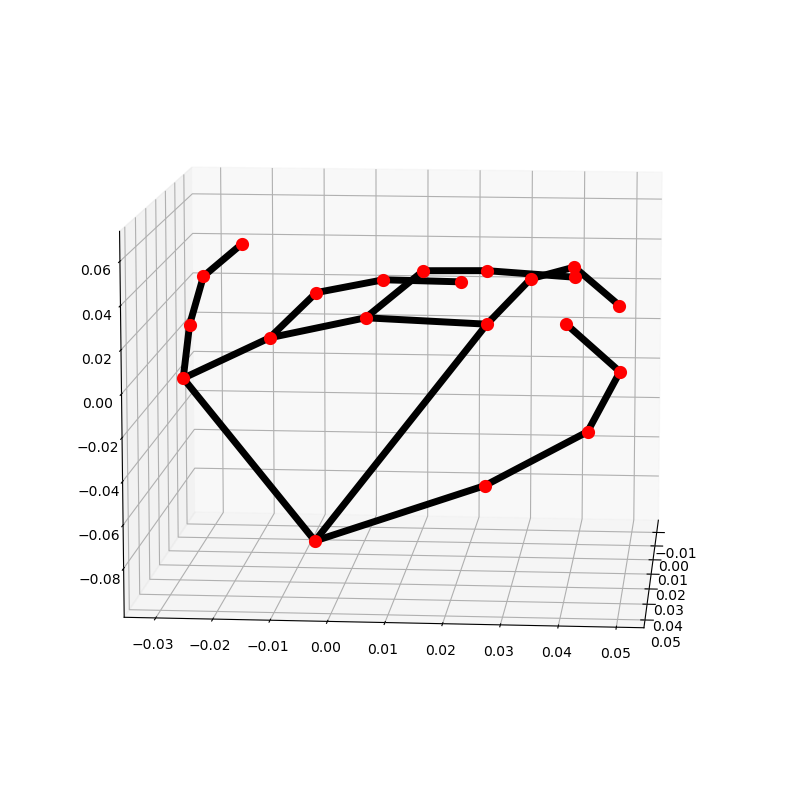

In [29]:
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
    for file in DF_sorry['path']:
        image = cv2.flip(cv2.imread(file), 1)
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        print('Handedness:', results.multi_handedness)
        if not results.multi_hand_landmarks:
            continue
        image_height, image_width, _ = image.shape
        annotated_image = image.copy()
        for hand_landmarks in results.multi_hand_landmarks:
            print('hand_landmarks:', hand_landmarks)
            print(
              f'Index finger tip coordinates: (',
              f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
              f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
          )
            mp_drawing.draw_landmarks(
              annotated_image,
              hand_landmarks,
              mp_hands.HAND_CONNECTIONS,
              mp_drawing_styles.get_default_hand_landmarks_style(),
              mp_drawing_styles.get_default_hand_connections_style())
            cv2.imwrite(
            'C:/Users/HOME/Desktop/AI_project/KSL/KSL_mp/' + file[-14:-4] + '.jpg', cv2.flip(annotated_image, 1))
            
        if not results.multi_hand_world_landmarks:
            continue
        for hand_world_landmarks in results.multi_hand_world_landmarks:
            mp_drawing.plot_landmarks(
            hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)